In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

fL = './ReadShowLeather/data/Leder.csv'
fH = './ReadShowLeather/data/Holz.csv'
fF = './ReadShowLeather/data/Fleisch.csv'
fS = '2016skin.csv'
fM = '2016material.csv'
fMF = '2016material-fake.csv'

Files = [fL, fH, fF, fM, fMF, fS]
decimals = [',',',',',','.','.','.']
Y_values= [0,0,0,0,0,1]

data = np.zeros((1,3))
for i, f in enumerate(Files):
    df = pd.read_csv(f, delimiter=';',decimal=decimals[i], index_col=0)
    df = df.dropna()
    for col in df.columns:
        Y=np.ones((len(df[col]),1))*Y_values[i]
        X1=df.index.to_numpy().reshape((-1,1))
        X2=df[col].to_numpy().reshape((-1,1))
        d=np.hstack((X1,X2,Y))
        data = np.vstack((data,d))
np.random.shuffle(data)
data = np.delete(data, 0, 0)

X= data[:,:2].reshape((-1,2))
Y= data[:,2]


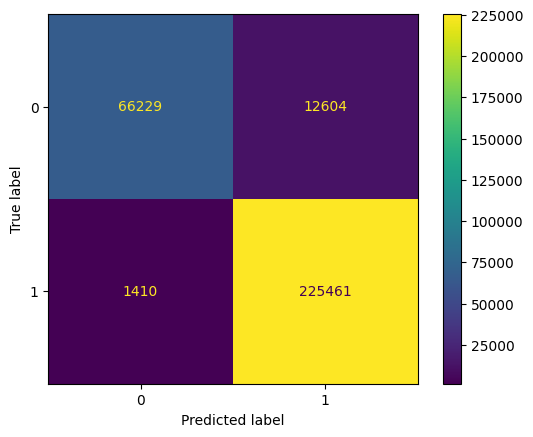

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

base = DecisionTreeClassifier(max_depth=16, max_leaf_nodes=10)

model = AdaBoostClassifier(estimator=base,
                           n_estimators=100,
                           learning_rate=0.05)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm_adaboost = confusion_matrix(y_test, y_pred)
disp_adaboot = ConfusionMatrixDisplay(cm_adaboost)
disp_adaboot.plot()


In [2]:
from sklearn.metrics import accuracy_score

# calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Model Accuracy:", accuracy)

#  calculate model recall:
recall = cm_adaboost[1, 1]/cm_adaboost[1, :].sum() # of the total actual positives, how much were classified correctly
print("AdaBoost Classifier Model recall:", recall)

#  calculate precision:
precision = cm_adaboost[1, 1]/cm_adaboost[:, 1].sum() # of all predicted positives, how much were True positives
print("AdaBoost Classifier Model precision:", precision)

#  not that neccessary for this problem, but for the completeness:
f1 = 2 * ((recall * precision)/(recall + precision)) 
print("AdaBoost Classifier Model F1-Score:", f1)


NameError: name 'y_test' is not defined